<a href="https://colab.research.google.com/github/sm0602/MLnow_2.0/blob/main/MultiTaskLearning_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/LiveCodeSession'

/content/drive/MyDrive/LiveCodeSession


In [3]:
ls

01_PerceptronTraining.ipynb           titanic/
02_EDA/                               winequality-red.csv
LogisticRegression.ipynb              winequality-white.csv
MultiTaskLearning_wine_quality.ipynb  winequality-white.gsheet


##Problem Statement:
Model wine quality estimations as a regression problem and wine type detection as a binary classification problem. 


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


In [5]:
white_df = pd.read_csv('winequality-white.csv', sep=';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
white_df['is_red'] = 0
white_df = white_df.drop_duplicates(keep='first')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [7]:
white_df.shape

(3961, 13)

In [8]:
print(white_df.alcohol[0])
print(white_df.pH[3])

8.8
3.19


In [9]:
red_df = pd.read_csv("winequality-red.csv", sep=";")
red_df['is_red'] = 1
red_df = red_df.drop_duplicates(keep = 'first')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [10]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

9.4
10.2


In [11]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [12]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
9.5


In [13]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
6,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
7,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
8,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,1


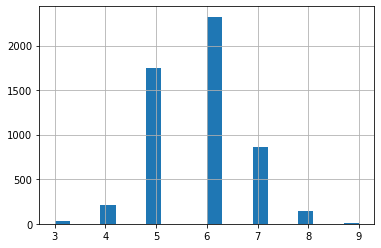

In [14]:
df['quality'].hist(bins=20)

In [15]:
df = df[(df['quality']>4) & (df['quality']<8)]
df = df.reset_index(drop = True)

In [16]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
10.9


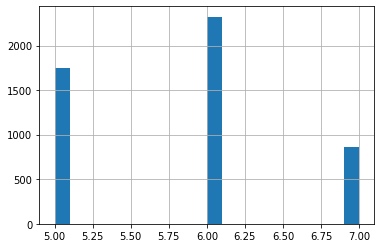

In [17]:
df['quality'].hist(bins=20)

In [18]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [21]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [22]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [23]:
def format_output(data):
  is_red = data.pop('is_red')
  is_red = np.array(is_red)
  quality = data.pop('quality')
  quality = np.array(quality)
  return (quality, is_red)

In [24]:
train_Y = format_output(train)
val_Y = format_output(val)
test_Y = format_output(test)

In [25]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


In [27]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [28]:
norm_train_X = norm(train)
norm_val_X = norm(val)
norm_test_X = norm(test)

In [29]:
def base_model(inputs):
  x = tf.keras.layers.Dense(units = 128, activation='relu')(inputs)
  x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
  return x

In [32]:
def final_model(inputs):
  x = base_model(inputs)
  wine_quality = Dense(units='1', name='wine_quality')(x)
  wine_type = Dense(units='1', activation = 'sigmoid', name = 'wine_type')(x)
  model = Model(inputs=inputs, outputs=[wine_quality, wine_type])

  return model

In [34]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms,
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mean_squared_error'
                      },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality' : tf.keras.metrics.RootMeanSquaredError()
                         }
              )

In [36]:
history = model.fit(norm_train_X, train_Y,
                     epochs=180, validation_data = (norm_val_X,val_Y))

Epoch 1/180
99/99 [==============================] - 2s 5ms/step - loss: 26.2820 - wine_quality_loss: 25.6003 - wine_type_loss: 0.6817 - wine_quality_root_mean_squared_error: 5.0597 - wine_type_accuracy: 0.5312 - val_loss: 18.2812 - val_wine_quality_loss: 17.6593 - val_wine_type_loss: 0.6219 - val_wine_quality_root_mean_squared_error: 4.2023 - val_wine_type_accuracy: 0.7706
Epoch 2/180
99/99 [==============================] - 0s 2ms/step - loss: 12.1634 - wine_quality_loss: 11.5739 - wine_type_loss: 0.5895 - wine_quality_root_mean_squared_error: 3.4020 - wine_type_accuracy: 0.8181 - val_loss: 7.0019 - val_wine_quality_loss: 6.4546 - val_wine_type_loss: 0.5473 - val_wine_quality_root_mean_squared_error: 2.5406 - val_wine_type_accuracy: 0.8707
Epoch 3/180
99/99 [==============================] - 0s 2ms/step - loss: 4.6229 - wine_quality_loss: 4.1166 - wine_type_loss: 0.5063 - wine_quality_root_mean_squared_error: 2.0289 - wine_type_accuracy: 0.8580 - val_loss: 3.0092 - val_wine_quality_l

In [37]:
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 [==============================] - 0s 1ms/step - loss: 0.3396 - wine_quality_loss: 0.3152 - wine_type_loss: 0.0244 - wine_quality_root_mean_squared_error: 0.5615 - wine_type_accuracy: 0.9949

loss: 0.3396149277687073
wine_quality_loss: 0.3152351975440979
wine_type_loss: 0.024379748851060867
wine_quality_rmse: 0.5614581108093262
wine_type_accuracy: 0.9949302673339844


In [38]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

In [39]:
print(quality_pred[0])

[5.6394553]


In [40]:
print(type_pred[0])
print(type_pred[944])

[0.00070262]
[0.99999577]


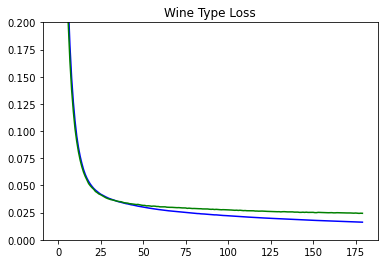

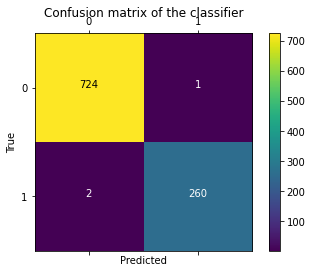

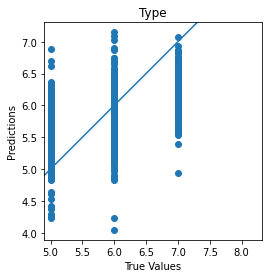

In [42]:
def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name], color='blue', label = metric_name)
  plt.plot(history.history['val_' + metric_name], color='green', label = 'val_'+metric_name)

def plot_confusion_matrix(y_true, y_pred, title='',labels=[0,1]):
  cm = confusion_matrix(y_true, y_pred)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  ax.set_xticklabels(['']+labels)
  ax.set_yticklabels(['']+labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="black" if cm[i, j] > thresh else "white")
  plt.show()

def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt


plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')